<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/predvalu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [459]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [460]:
df = pd.read_csv("/content/spi3lagged.csv")
df

,date,maxtemp,rh,soil.moisture,root soil wetness,surface soil wetness,sl1,sl2,spi3
0,01-03-1981,32.041786,62.846786,0.354643,0.453929,0.453214,-0.948040,-0.771554,-0.609626
1,01-04-1981,33.429355,62.240000,0.238065,0.415161,0.417097,-0.609626,-0.948040,-0.237465
2,01-05-1981,32.831333,69.870333,0.292667,0.416333,0.414333,-0.237465,-0.609626,0.035132
3,01-06-1981,30.221613,77.254839,0.502258,0.505161,0.494194,0.035132,-0.237465,1.642811
4,01-07-1981,27.278000,86.731000,0.925000,0.900667,0.875667,1.642811,0.035132,1.162105
...,...,...,...,...,...,...,...,...,...
485,01-08-2021,27.359032,89.194839,0.959355,0.975161,0.961613,1.277979,0.848941,0.710179
486,01-09-2021,27.448710,88.669355,0.934194,0.960000,0.939355,0.710179,1.277979,0.685178
487,01-10-2021,27.761667,88.440000,0.935333,0.959333,0.940000,0.685178,0.710179,0.800410
488,01-11-2021,28.322581,86.146774,0.939355,0.960968,0.943226,0.800410,0.685178,0.550892


In [461]:
del df["date"]

In [462]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [463]:
# Scaling the entire dataset

dataset = df
values = dataset.values

#values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df[["maxtemp"	,"rh"	,"soil.moisture"	,"root soil wetness"	,"surface soil wetness"	,"sl1"	,"sl2",	"spi3"]])
print(scaled.shape)

(490, 8)


            0         1         2         3         4         5         6  \
0    0.768310  0.160905  0.218374  0.102063  0.094036  0.121434  0.175201   
1    0.949373  0.143131  0.073708  0.037476  0.032524  0.224534  0.121434   
2    0.871338  0.366635  0.141466  0.039429  0.027817  0.337915  0.224534   
3    0.530797  0.582937  0.401553  0.187417  0.163828  0.420964  0.337915   
4    0.146687  0.860508  0.926145  0.846333  0.813519  0.910755  0.420964   
..        ...       ...       ...       ...       ...       ...       ...   
485  0.157261  0.932677  0.968777  0.970442  0.959895  0.799606  0.668897   
486  0.168963  0.917285  0.937553  0.945183  0.921987  0.626622  0.799606   
487  0.209800  0.910567  0.938968  0.944072  0.923085  0.619005  0.626622   
488  0.282993  0.843395  0.943958  0.946795  0.928579  0.654111  0.619005   
489  0.253471  0.816483  0.937727  0.944072  0.926492  0.578094  0.654111   

            7  
0    0.224534  
1    0.337915  
2    0.420964  
3    0.9107

In [435]:
tf = pd.DataFrame(scaled, columns = ["maxtemp"	,"rh",	"soil.moisture",	"root soil wetness",	"surface soil wetness",	"sl1",	"sl2",	"spi1"])
tf

,maxtemp,rh,soil.moisture,root soil wetness,surface soil wetness,sl1,sl2,spi1
0,0.768310,0.160905,0.218374,0.102063,0.094036,0.121434,0.175201,0.224534
1,0.949373,0.143131,0.073708,0.037476,0.032524,0.224534,0.121434,0.337915
2,0.871338,0.366635,0.141466,0.039429,0.027817,0.337915,0.224534,0.420964
3,0.530797,0.582937,0.401553,0.187417,0.163828,0.420964,0.337915,0.910755
4,0.146687,0.860508,0.926145,0.846333,0.813519,0.910755,0.420964,0.764304
...,...,...,...,...,...,...,...,...
485,0.157261,0.932677,0.968777,0.970442,0.959895,0.799606,0.668897,0.626622
486,0.168963,0.917285,0.937553,0.945183,0.921987,0.626622,0.799606,0.619005
487,0.209800,0.910567,0.938968,0.944072,0.923085,0.619005,0.626622,0.654111
488,0.282993,0.843395,0.943958,0.946795,0.928579,0.654111,0.619005,0.578094


In [436]:
values = tf.values

# We train the model on the 1st 3 years and then test on the last year (for now)
n_train_hours = 390

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(390, 1, 7) (390,) (100, 1, 7) (100,)


In [420]:
train.shape, test.shape, values.shape

((390, 8), (100, 8), (490, 8))

In [437]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization,GRU
from tensorflow.keras.models import Sequential

In [438]:
model = Sequential()
model.add(LSTM(1000, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.8))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()
# fit network
history = model.fit(train_X, train_y, epochs=70, batch_size=25, validation_split=0.2, verbose=2, shuffle=False)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 1000)              4032000   
                                                                 
 dropout_9 (Dropout)         (None, 1000)              0         
                                                                 
 dense_9 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4,033,001
Trainable params: 4,033,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
13/13 - 3s - loss: 0.0947 - val_loss: 0.0558 - 3s/epoch - 220ms/step
Epoch 2/70
13/13 - 1s - loss: 0.0508 - val_loss: 0.0488 - 574ms/epoch - 44ms/step
Epoch 3/70
13/13 - 1s - loss: 0.0422 - val_loss: 0.0480 - 565ms/epoch - 43ms/step
Epoch 4/70
13/13 - 1s - loss: 0.0386 - val_loss: 0.0418 - 578ms/

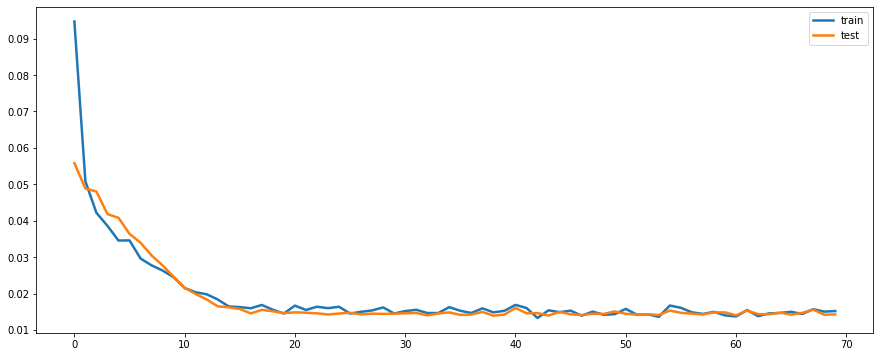

In [439]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='train', linewidth = 2.5)
plt.plot(history.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

In [424]:
test_X.shape

(100, 1, 7)

In [440]:
testPredict = model.predict(test_X)
print(testPredict.shape)
testPredict = testPredict.ravel()

print(testPredict.shape)

(100, 1)
(100,)


In [441]:
y_test_true = test[:,7]

In [442]:
poll = np.array(df['spi3'])
print(poll.shape)
meanop = poll.mean()
stdop = poll.std()
print(testPredict.shape)
y_test_true = y_test_true*stdop + meanop
testPredict = testPredict*stdop + meanop

testPredict.shape

(490,)
(100,)


(100,)

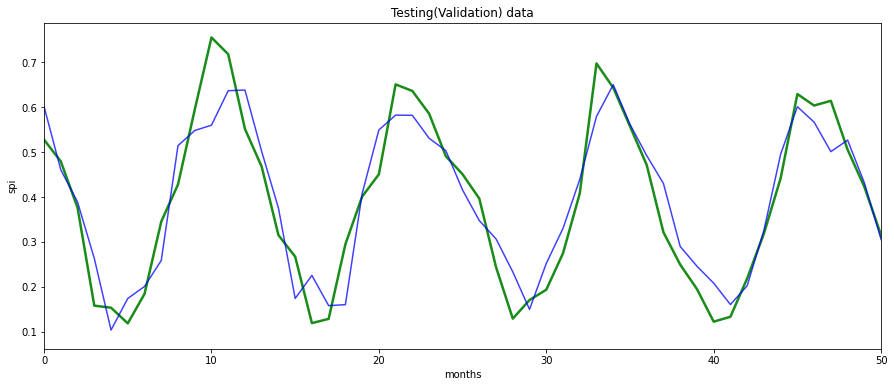

(100,)


In [443]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))
plt.xlim([0,50])
plt.ylabel("spi")
plt.xlabel("months")

plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()
#testPredict=testPredict.reshape(-1,1)
print(testPredict.shape)
#testTrue = scaler.inverse_transform(testPredict)

In [444]:
from sklearn.metrics import r2_score
r=r2_score(y_test_true, testPredict)
print("r2socre ="  ,r)
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

r2socre = 0.8361555237015627
Test(Validation) RMSE = 0.07498306699608695


In [445]:
testPredict

array([0.60141295, 0.4604066 , 0.38880292, 0.26317152, 0.10346923,
       0.173866  , 0.20063278, 0.25852585, 0.5144548 , 0.5481333 ,
       0.5599845 , 0.6368463 , 0.63826925, 0.5012412 , 0.37546167,
       0.17391384, 0.22530136, 0.15785642, 0.16010323, 0.40735963,
       0.5494178 , 0.5823896 , 0.5819778 , 0.53095585, 0.5032686 ,
       0.41560888, 0.34735245, 0.3065875 , 0.23311806, 0.14951423,
       0.25199237, 0.3300475 , 0.4391213 , 0.57953364, 0.65023947,
       0.5619671 , 0.49224797, 0.42993   , 0.2898245 , 0.24577302,
       0.20803452, 0.16032952, 0.20204088, 0.32556137, 0.49522647,
       0.6010852 , 0.56682086, 0.5010496 , 0.5266593 , 0.43169   ,
       0.30548215, 0.23724249, 0.16050708, 0.19666585, 0.17312276,
       0.34329703, 0.51918286, 0.6475365 , 0.5086931 , 0.5458057 ,
       0.5400768 , 0.3776645 , 0.2770029 , 0.26245323, 0.2626031 ,
       0.11516856, 0.18951133, 0.2886609 , 0.48946902, 0.55144584,
       0.6046221 , 0.543601  , 0.59198946, 0.5028695 , 0.46198

In [446]:
gf = pd.DataFrame(testPredict) 
gf

,0
0,0.601413
1,0.460407
2,0.388803
3,0.263172
4,0.103469
...,...
95,0.563606
96,0.484765
97,0.440269
98,0.436916


In [466]:
sf = pd.read_csv("/content/TEST3.csv")
sf
scaler = MinMaxScaler(feature_range=(0, 1))
sf = scaler.fit_transform(df[["maxtemp"	,"rh"	,"soil.moisture"	,"root soil wetness"	,"surface soil wetness"	,"sl1"	,"sl2",	"spi3"]])
sf=pd.DataFrame(sf)
print(sf)
sf[7]=gf
sf


            0         1         2         3         4         5         6  \
0    0.768310  0.160905  0.218374  0.102063  0.094036  0.121434  0.175201   
1    0.949373  0.143131  0.073708  0.037476  0.032524  0.224534  0.121434   
2    0.871338  0.366635  0.141466  0.039429  0.027817  0.337915  0.224534   
3    0.530797  0.582937  0.401553  0.187417  0.163828  0.420964  0.337915   
4    0.146687  0.860508  0.926145  0.846333  0.813519  0.910755  0.420964   
..        ...       ...       ...       ...       ...       ...       ...   
485  0.157261  0.932677  0.968777  0.970442  0.959895  0.799606  0.668897   
486  0.168963  0.917285  0.937553  0.945183  0.921987  0.626622  0.799606   
487  0.209800  0.910567  0.938968  0.944072  0.923085  0.619005  0.626622   
488  0.282993  0.843395  0.943958  0.946795  0.928579  0.654111  0.619005   
489  0.253471  0.816483  0.937727  0.944072  0.926492  0.578094  0.654111   

            7  
0    0.224534  
1    0.337915  
2    0.420964  
3    0.9107

,0,1,2,3,4,5,6,7
0,0.768310,0.160905,0.218374,0.102063,0.094036,0.121434,0.175201,0.601413
1,0.949373,0.143131,0.073708,0.037476,0.032524,0.224534,0.121434,0.460407
2,0.871338,0.366635,0.141466,0.039429,0.027817,0.337915,0.224534,0.388803
3,0.530797,0.582937,0.401553,0.187417,0.163828,0.420964,0.337915,0.263172
4,0.146687,0.860508,0.926145,0.846333,0.813519,0.910755,0.420964,0.103469
...,...,...,...,...,...,...,...,...
485,0.157261,0.932677,0.968777,0.970442,0.959895,0.799606,0.668897,NaN
486,0.168963,0.917285,0.937553,0.945183,0.921987,0.626622,0.799606,NaN
487,0.209800,0.910567,0.938968,0.944072,0.923085,0.619005,0.626622,NaN
488,0.282993,0.843395,0.943958,0.946795,0.928579,0.654111,0.619005,NaN


In [382]:
df["spi3"] = testPredict
df

,maxtemp,rh,soil.moisture,root soil wetness,surface soil wetness,sl1,sl2,spi3
0,26.963871,89.645161,0.958387,0.977419,0.966774,1.104107,1.935748,0.584032
1,27.097333,88.427333,0.925333,0.952667,0.929000,0.647083,1.104107,0.445855
2,27.813226,85.582581,0.900000,0.918710,0.893226,0.448111,0.647083,0.375713
3,29.184667,77.127000,0.841667,0.841667,0.813667,0.023097,0.448111,0.252060
4,29.127419,68.945484,0.679032,0.667742,0.649677,-0.874523,0.023097,0.096423
...,...,...,...,...,...,...,...,...
95,27.359032,89.194839,0.959355,0.975161,0.961613,1.277979,0.848941,0.547761
96,27.448710,88.669355,0.934194,0.960000,0.939355,0.710179,1.277979,0.469577
97,27.761667,88.440000,0.935333,0.959333,0.940000,0.685178,0.710179,0.426042
98,28.322581,86.146774,0.939355,0.960968,0.943226,0.800410,0.685178,0.422477


In [457]:
#testPredict=testPredict.reshape(-1,1)
testTrue = scaler.inverse_transform(sf)
sf

,0,1,2,3,4,5,6,7
0,0.768310,0.160905,0.218374,0.102063,0.094036,0.121434,0.175201,0.601413
1,0.949373,0.143131,0.073708,0.037476,0.032524,0.224534,0.121434,0.460407
2,0.871338,0.366635,0.141466,0.039429,0.027817,0.337915,0.224534,0.388803
3,0.530797,0.582937,0.401553,0.187417,0.163828,0.420964,0.337915,0.263172
4,0.146687,0.860508,0.926145,0.846333,0.813519,0.910755,0.420964,0.103469
...,...,...,...,...,...,...,...,...
485,0.157261,0.932677,0.968777,0.970442,0.959895,0.799606,0.668897,NaN
486,0.168963,0.917285,0.937553,0.945183,0.921987,0.626622,0.799606,NaN
487,0.209800,0.910567,0.938968,0.944072,0.923085,0.619005,0.626622,NaN
488,0.282993,0.843395,0.943958,0.946795,0.928579,0.654111,0.619005,NaN


In [384]:
gf = pd.DataFrame(testTrue)
gf 

,0,1,2,3,4,5,6,7
0,232.790481,3117.810437,0.950982,0.979349,0.965652,2.277468,5.007228,0.570384
1,233.813265,3076.234183,0.924346,0.964492,0.943473,0.777340,2.277468,0.116835
2,239.299480,2979.115245,0.903931,0.944110,0.922468,0.124240,0.777340,-0.113399
3,249.809465,2690.444449,0.856923,0.897866,0.875754,-1.270818,0.124240,-0.519276
4,249.370753,2411.130127,0.725864,0.793470,0.779465,-4.217146,-1.270818,-1.030135
...,...,...,...,...,...,...,...,...
95,235.818785,3102.436569,0.951762,0.977994,0.962622,2.848181,1.439917,0.451328
96,236.506024,3084.496720,0.931486,0.968894,0.949553,0.984444,2.848181,0.194699
97,238.904359,3076.666619,0.932405,0.968494,0.949932,0.902382,0.984444,0.051801
98,243.202902,2998.376630,0.935645,0.969475,0.951826,1.280619,0.902382,0.040099
